---
## 🧭 EDA Step 1: Import & Preview Data

We'll:

1. Import necessary libraries
2. Load the CSV file
3. Preview the data structure
4. Get initial info about columns and data types

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/mnt/shared/Data_Analytics_Projects/Superstore_Sales_Data/Sample - Superstore 2(cleaned).csv"

# Load the dataset
df = pd.read_csv(file_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Region         9994 non-null   object 
 10  Category       9994 non-null   object 
 11  Sub-Category   9994 non-null   object 
 12  Product Name   9994 non-null   object 
 13  Sales          9994 non-null   float64
 14  Quantity       9994 non-null   int64  
 15  Discount       9994 non-null   float64
 16  Profit         9994 non-null   float64
dtypes: float64(3), int64(2), object(12)
memory usage: 1.

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


---

## 🧹 **EDA Step 2: Data Cleaning**

This step ensures your data is accurate, consistent, and ready for analysis.

1. **Check for Duplicates**
2. **Check for Missing Values**
3. **Fix Data Types (especially Dates)**
4. **Trim Whitespaces in Object Columns** (if needed)
5. **Check for Outliers (Optional, later)**

### ✅ 1. **Check for Duplicates**


In [3]:
# Count duplicates
df.duplicated().sum()

# Remove duplicates if any
df = df.drop_duplicates()


### ✅ 2. **Check for Missing Values**

If there are missing values:

- For numeric columns: fill with mean/median.
- For categorical: fill with mode or mark as "Unknown".

Example:

In [ ]:
# See missing values in each column
print(df.isnull().sum())

# If it exists then We should use this one
df['Order ID'] = df['Order ID'].fillna(df['Order ID'].mode()[0])


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


### ✅ 3. **Fix Data Types (especially Dates)**

In [12]:
# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


### ✅ 4. **Trim Whitespaces in Object Columns** (if needed)

In [13]:
# Trim leading/trailing spaces in object (string) columns
df_obj = df.select_dtypes(include='object')
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())


---
## 📊 **EDA Step 3: Univariate Analysis**

**Goal**: Understand individual features (columns) in isolation to get a sense of the data distribution, outliers, and structure.

### 🔹 What does *Univariate* mean?

> "Uni" means one — you're looking at one column at a time.

### ✅ 1. **Analyze Numeric Columns**

We focus on these:

- `Sales`, `Profit`, `Quantity`, `Discount`

In [14]:
df[['Sales', 'Profit', 'Quantity', 'Discount']].describe()


,Sales,Profit,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,3.789574,0.156203
std,623.245101,234.260108,2.225110,0.206452
min,0.444000,-6599.978000,1.000000,0.000000
25%,17.280000,1.728750,2.000000,0.000000
50%,54.490000,8.666500,3.000000,0.200000
75%,209.940000,29.364000,5.000000,0.200000
max,22638.480000,8399.976000,14.000000,0.800000


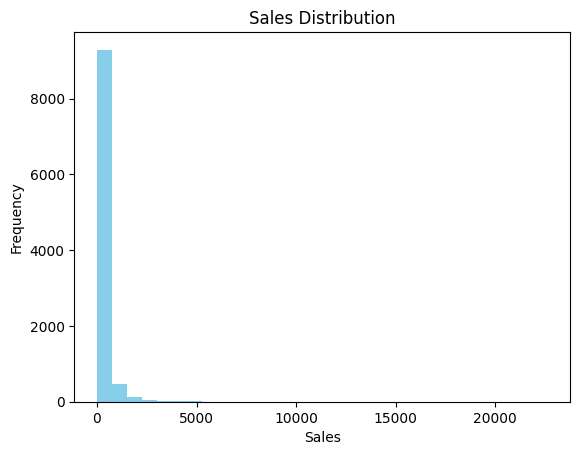

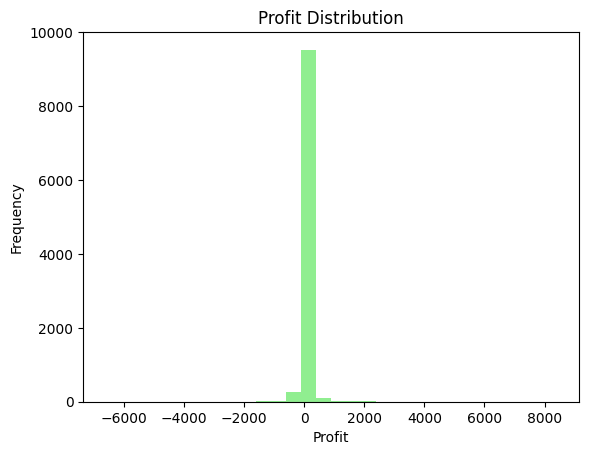

In [15]:
df['Sales'].plot(kind='hist', bins=30, title='Sales Distribution', color='skyblue')
plt.xlabel('Sales')
plt.show()

df['Profit'].plot(kind='hist', bins=30, title='Profit Distribution', color='lightgreen')
plt.xlabel('Profit')
plt.show()

### ✅ 2. **Analyze Categorical Columns**

Key columns:

- `Region`, `Category`, `Sub-Category`, `Segment`, `Ship Mode`

#### 📊 Value Counts:

```python
df['Region'].value_counts()
df['Category'].value_counts()

```

#### 📉 Bar Plots:

```python
df['Region'].value_counts().plot(kind='bar', title='Orders by Region', color='orange')
plt.ylabel('Count')
plt.show()

df['Category'].value_counts().plot(kind='bar', title='Orders by Category', color='teal')
plt.ylabel('Count')
plt.show()

```

In [ ]:
df['Region'].value_counts()
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

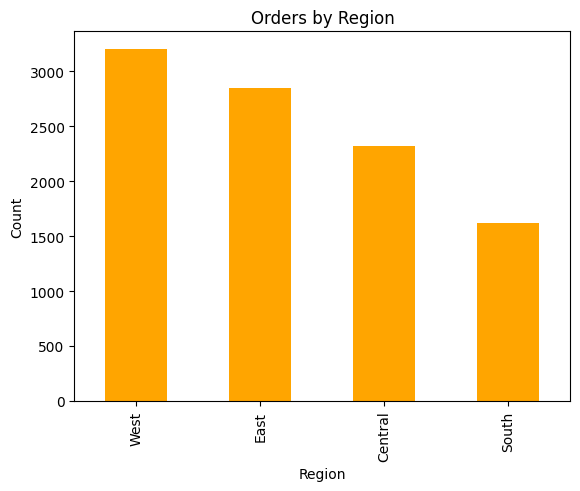

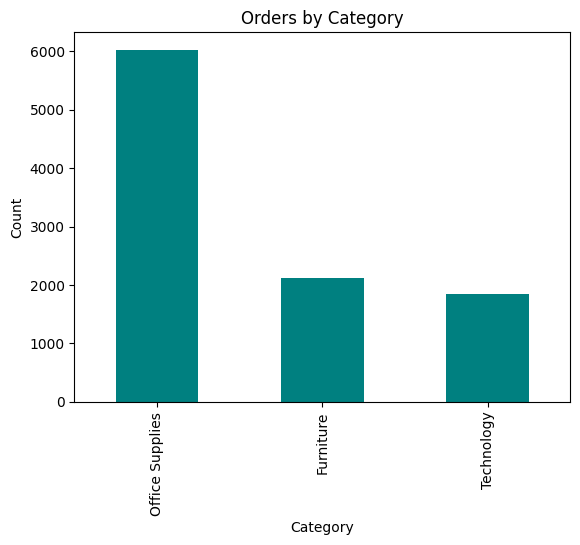

In [ ]:
df['Region'].value_counts().plot(kind='bar', title='Orders by Region', color='orange')
plt.ylabel('Count')
plt.show()

df['Category'].value_counts().plot(kind='bar', title='Orders by Category', color='teal')
plt.ylabel('Count')
plt.show()


---
## 🔗 **EDA Step 4: Bivariate Analysis**

**Goal**: Understand relationships between two variables — e.g., how sales affect profit, or which category gives more profit.


### ✅ 1. **Numerical vs Numerical**

We analyze relationships between `Sales`, `Profit`, `Discount`, `Quantity`.

#### 🔸 Scatter Plot: Sales vs Profit

```python
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

```

- Helps find correlation, losses (negative profits), outliers.

#### 🔸 Correlation Matrix

```python
corr = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
print(corr)

import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

```

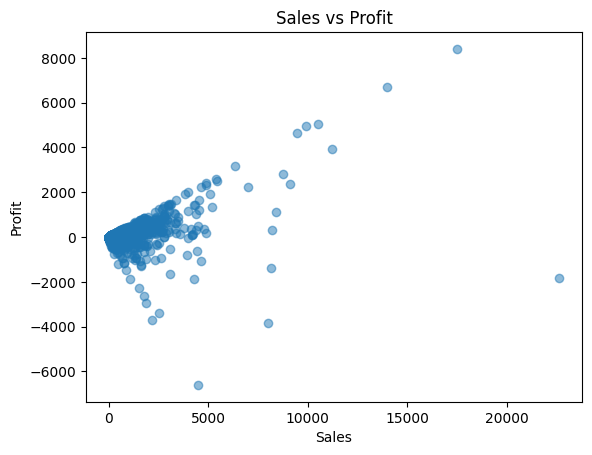

In [29]:
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

             Sales    Profit  Quantity  Discount
Sales     1.000000  0.479064  0.200795 -0.028190
Profit    0.479064  1.000000  0.066253 -0.219487
Quantity  0.200795  0.066253  1.000000  0.008623
Discount -0.028190 -0.219487  0.008623  1.000000


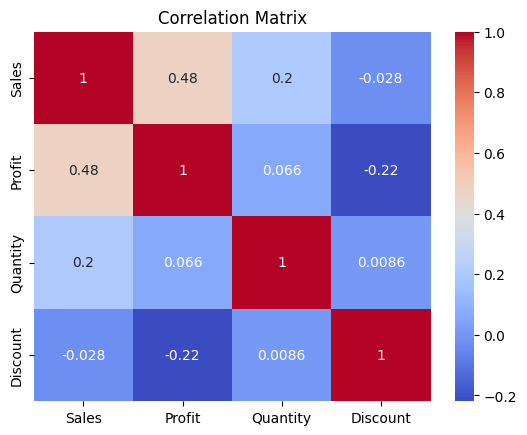

In [30]:
corr = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
print(corr)

import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# I should take a break here